# **Data Science in Telco : Data Cleansing**

## **Introduction**

## **Latar Belakang**

DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience-nya sehingga tidak akan ditinggalkan pelanggan.

Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitor. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

Oleh karena itu, tim Data Scientist diminta untuk mempersiapkan data sekaligus membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak.

### **Tugas dan Langkah**

Tugas Data Scientist : Melakukan Data Preprocessing (Data Cleansing) pada dataframe untuk bulan Juni 2020

Langkah yang akan dilakukan adalah,
1. Mencari ID pelanggan (Nomor telepon) yang valid
2. Mengatasi data-data yang masih kosong (Missing Values)
3. Mengatasi nilai-nilai pencilan (Outlier) dari setiap variabel
4. Menstandardisasi nilai dari variabel

## **Library dan Data yang Digunakan**

### **Library yang Digunakan**

Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data.

 1. **Pandas**
Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
- read_csv() untuk membaca file csv
- str.match() untuk mencocokan dengan karakter tertentu
- drop() untuk menghapus
- count() untuk menghitung masing-masing variabel
- drop_duplicates() untuk menghapus data duplicate rows
- fillna() untuk mengisi dengan nilai tertentu
- quantile() untuk melihat quantile ke tertentu
- mask() mengganti nilai tertentu jika kondisi memenuhi
- astype() mengubah tipe data
- value_counts() untuk menghitung unik dari kolom
- sort_values() untuk sort values
- isnull() untuk mendeteksi missing values
- dropna() untuk menghapus missing values
- replace() untuk mengganti nilai

 2. **Matplotlib**
Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.
- figure() untuk membuat figure gambar baru

 3. **Seaborn** 
Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional terlihat sedikit lebih cantik.
- box_plot() untuk membuat box plot


### **Data yang Digunakan**

Dataset format csv, silahkan baca melalui fungsi pandas di python `df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')`

Untuk detail datanya adalah sebagai berikut:

- UpdatedAt, Periode of data taken
- customerID, Customer ID
- gender, Whether the customer is a male or a female (Male, Female)
- SeniorCitizen, Whether the customer is a senior citizen or not (1, 0)
- Partner, Whether the customer has a partner or not (Yes, No)
- Dependents, Whether the customer has a dependents or not (Yes, No)
- tenure, Number of months the customer has stayed with the company
- PhoneService, Whether the customer has a phone service or not (Yes, No)
- MultipleLines, Whether the customer has a multiple lines or not (Yes, No)
- InternetService, Customer's internet service provider (DSL, Fiber optic, No)
- OnlineSecurity, Whether the customer has a online security or not (Yes, No, No internet service)
- OnlineBackup, Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection, Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport, Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV, Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies, Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract, The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling, Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod, The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges, The amount charged to the customer monthly
- TotalCharges, The total amount charged to the customer
- Churn, Whether the customer churned or not (Yes or No)

### **Import Library dan Dataset**

Berdasarkan penjelasan mengenai library dan dataset yang akan digunakan, hal pertama yang akan dilakukan adalah melakukan import library dan dataset ke dalam workspace. 

Setelah dataset di-import ke dalam workspace, gunakan:
- `.shape` untuk informasi jumlah kolom dan baris dari dataset
- `.head()` untuk menampilkan 5 baris teratas
- `.nunique()` untuk mengetahui nilai kolom yang bersifat unique 

In [ ]:
#import library
import pandas as pd
pd.options.display.max_columns = 50
#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

Note: pd.options.display.max_columns = 50 digunakan untuk mempermudah penampilan row data

In [ ]:
#Tampilkan jumlah baris dan kolom
print(df_load.shape)

(7113, 22)


In [ ]:
#Tampilkan 5 data teratas
print(df_load.head(5))

   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV S

In [ ]:
#Jumlah ID yang unik
print(df_load.customerID.nunique())

7017


## **Mencari Validitas ID Number Pelanggan**

### **Memfilter ID Number Pelanggan Format Tertentu**

Pelanggan customerID yang benar memiliki kriteria:
- Panjang karakter adalah 11-12
- Terdiri dari angka saja
- Diawali dengan angka 45 dua digit pertama

Gunakan beberapa fungsi berikut:
- `.count()` untuk menghitung banyaknya rows Customer ID 
- `.str.match()` dan regex dapat digunakan untuk mencocokan dengan kriteria diatas
- `.astype()` untuk merubah tipe data yang semula numeric

Note: Buat kolom bantuan baru dengan nama 'valid_id'

In [ ]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id',axis=1)
print('Hasil jumlah ID customer yang terfilter adalah ', df_load['customerID'].count())

Hasil jumlah ID customer yang terfilter adalah  7006


### **Memfilter Duplikasi ID Number Pelanggan**

Biasanya duplikasi ID number pelanggan tipenya:
- Inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
- Inserting beda periode pengambilan data

Gunakan beberapa fungsi berikut:
- `.drop_duplicates()` untuk menghapus duplikasi rows
- `.sort_values()` untuk mengecek pengambilan data terakhir

In [ ]:
# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


### **Kesimpulan**

Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 columns dengan 7017 jumlah ID yang unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data.

## **Mengatasi Missing Values**

### **Mengatasi Missing Values dengan Penghapusan Rows**

Proses menghapus rows dari data-data yang tidak terdeteksi churn. Diasumsikan data modeller hanya mau menerima data yang benar ada flag churn atau tidak.

Gunakan beberapa fungsi berikut:
- `.isnull()` untuk mendeteksi missing values
- `.dropna()` untuk menghapus data yang missing values

In [ ]:
print('Total missing values data dari kolom Churn', df_load['Churn'].isnull().sum())

Total missing values data dari kolom Churn 43


In [ ]:
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'],inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah', df_load.shape)

Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


### **Mengatasi Missing Values dengan Pengisian Nilai tertentu**

Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:
- Tenure, pihak data modeller meminta setiap rows yang memiliki missing values untuk lama berlangganan di isi 11.
- Variabel yang bersifat numeric selain Tenure di isi median masing-masing variabel

Tentukan:
- Apakah masih ada data yang missing values
- Jumlah missing values masing-masing variabel
- Tangani missing values

In [ ]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64


In [ ]:
#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)
        
#Loop
#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    #write your command here
        median = df_load[col_name].median()
        df_load[col_name].fillna(median, inplace=True)
        	
print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64


### **Kesimpulan**

Setelah melakukan analisis, masih ada missing values dari data yang sudah divalidkan ID Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges, dan TotalCharges. Setelah menghapus rows dan mengisi rows dengan nilai tertentu, sudah tidak ada missing values lagi pada data, sehingga jumlah missing values masing-masing variabel bernilai 0. 

## **Mengatasi Outlier**



### **Mendeteksi adanya Outlier (Boxplot)**

Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman). Salah satu cara mendeteksi oulier adalah dengan boxplot. 

Berikut tampilan umum dari boxplot dalam merepresentasikan outlier

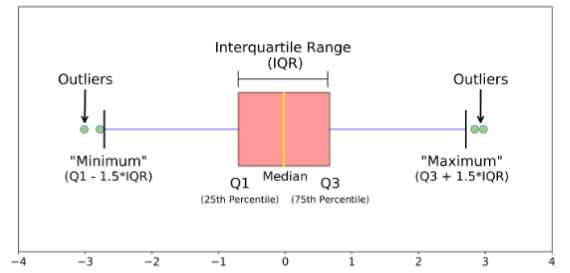

In [ ]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


Note : `.describe()` untuk memperoleh statistik deskriptif kolom

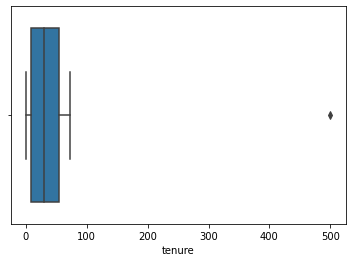

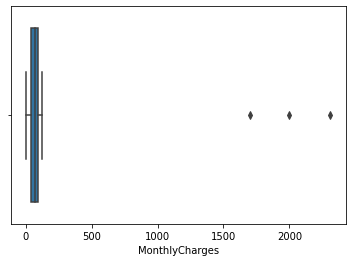

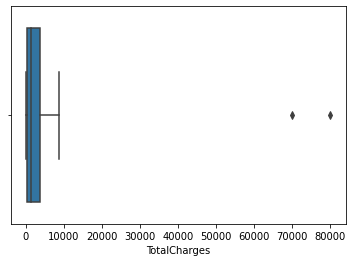

In [ ]:
# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns
        
# Misal untuk kolom tenure
plt.figure() #buat figure baru
sns.boxplot(x=df_load['tenure'])
plt.show()
# dan seterusnya untuk kedua kolom yang tersisa secara berurut
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

### **Mengatasi Outlier**

Metode interquartile range (IQR) dapat digunakan untuk mengatasi outlier.

Gunakan beberapa fungsi berikut:
- `.quantile()` untuk melihat kuantil tertentu
- `.mask()` untuk menggantikan nilai

Tentukan:
- Nilai minimum dan maksimum data di tolerir
- Ubah nilai yang di luar range minimum dan maksimum ke dalam nilai minimum dan maksimum

In [ ]:
# Your code goes here
#Atasi outlier dengan IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
        
IQR = Q3 - Q1
maximum = Q3 + (1.5 * IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
        
minimum = Q1 - (1.5 * IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [ ]:
more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())


Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


<ipython-input-17-7aff4103278f>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
<ipython-input-17-7aff4103278f>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)


### **Kesimpulan**

Dari ketiga boxplot dengan variabel tenure, MonthlyCharges, dan TotalCharges terlihat jelas ada outlier. Hal ini bisa diidentifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot. Kemudian kalau kita lihat persebaran data dari kolom max juga ada nilai yang sangat tinggi sekali. Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai max dan min dari IQR. Setelah ditangani outlier dan dilihat persebaran data sudah tidak ada lagi nilai outlier.

## **Menstandarisasi Nilai**

### **Mendeteksi Nilai yang tidak Standar**

Hal ini biasanya terjadi karena kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi.

Gunakan `.value_counts()` untuk melihat jumlah data unique per variabel.

In [ ]:
#Loop #Memasukkan variabel
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
        print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
        print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

### **Menstandarisasi Variable Kategorik**

Contoh: Iya -> Yes

Lihat kembali unique values dari variabel yang sudah diubah.

Gunakan `.replace()` untuk menstandarkan nilai.

In [ ]:
df_load = df_load.replace(['Wanita','Laki-laki','Churn','Iya'],['Female','Male','Yes','Yes'])
        
#Loop #Masukkan variabel
for col_name in list(['gender','Dependents','Churn']):
 # write your command here
        print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
        print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male         3499
Female       3445
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


### **Kesimpulan**

Ada beberapa variabel yang tidak standar, yaitu:
- Gender: Female, Male, Wanita, Laki-laki. Bisa distandarkan nilainya menjadi Female dan Male karena mempunyai makna yang sama
- Dependents: Yes, No, Iya. Bisa distandarkan nilainya menjadi Yes dan No karena mempunyai makna yang sama
- Churn: Yes, No, Churn. Bisa distandarkan nilainya menjadi Yes dan No karena mempunyai makna yang sama
Setelah melakukan standardisasi nilai, amati kembali bentuk data. Unique value sudah terstandar dengan baik.
